First 5 rows of the dataset:
    outlook  temp humidity  windy play
0     sunny   hot     high  False   no
1     sunny   hot     high   True   no
2  overcast   hot     high  False  yes
3     rainy  mild     high  False  yes
4     rainy  cool   normal  False  yes
Accuracy: 100.00%
Predicted class for the new sample: no


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


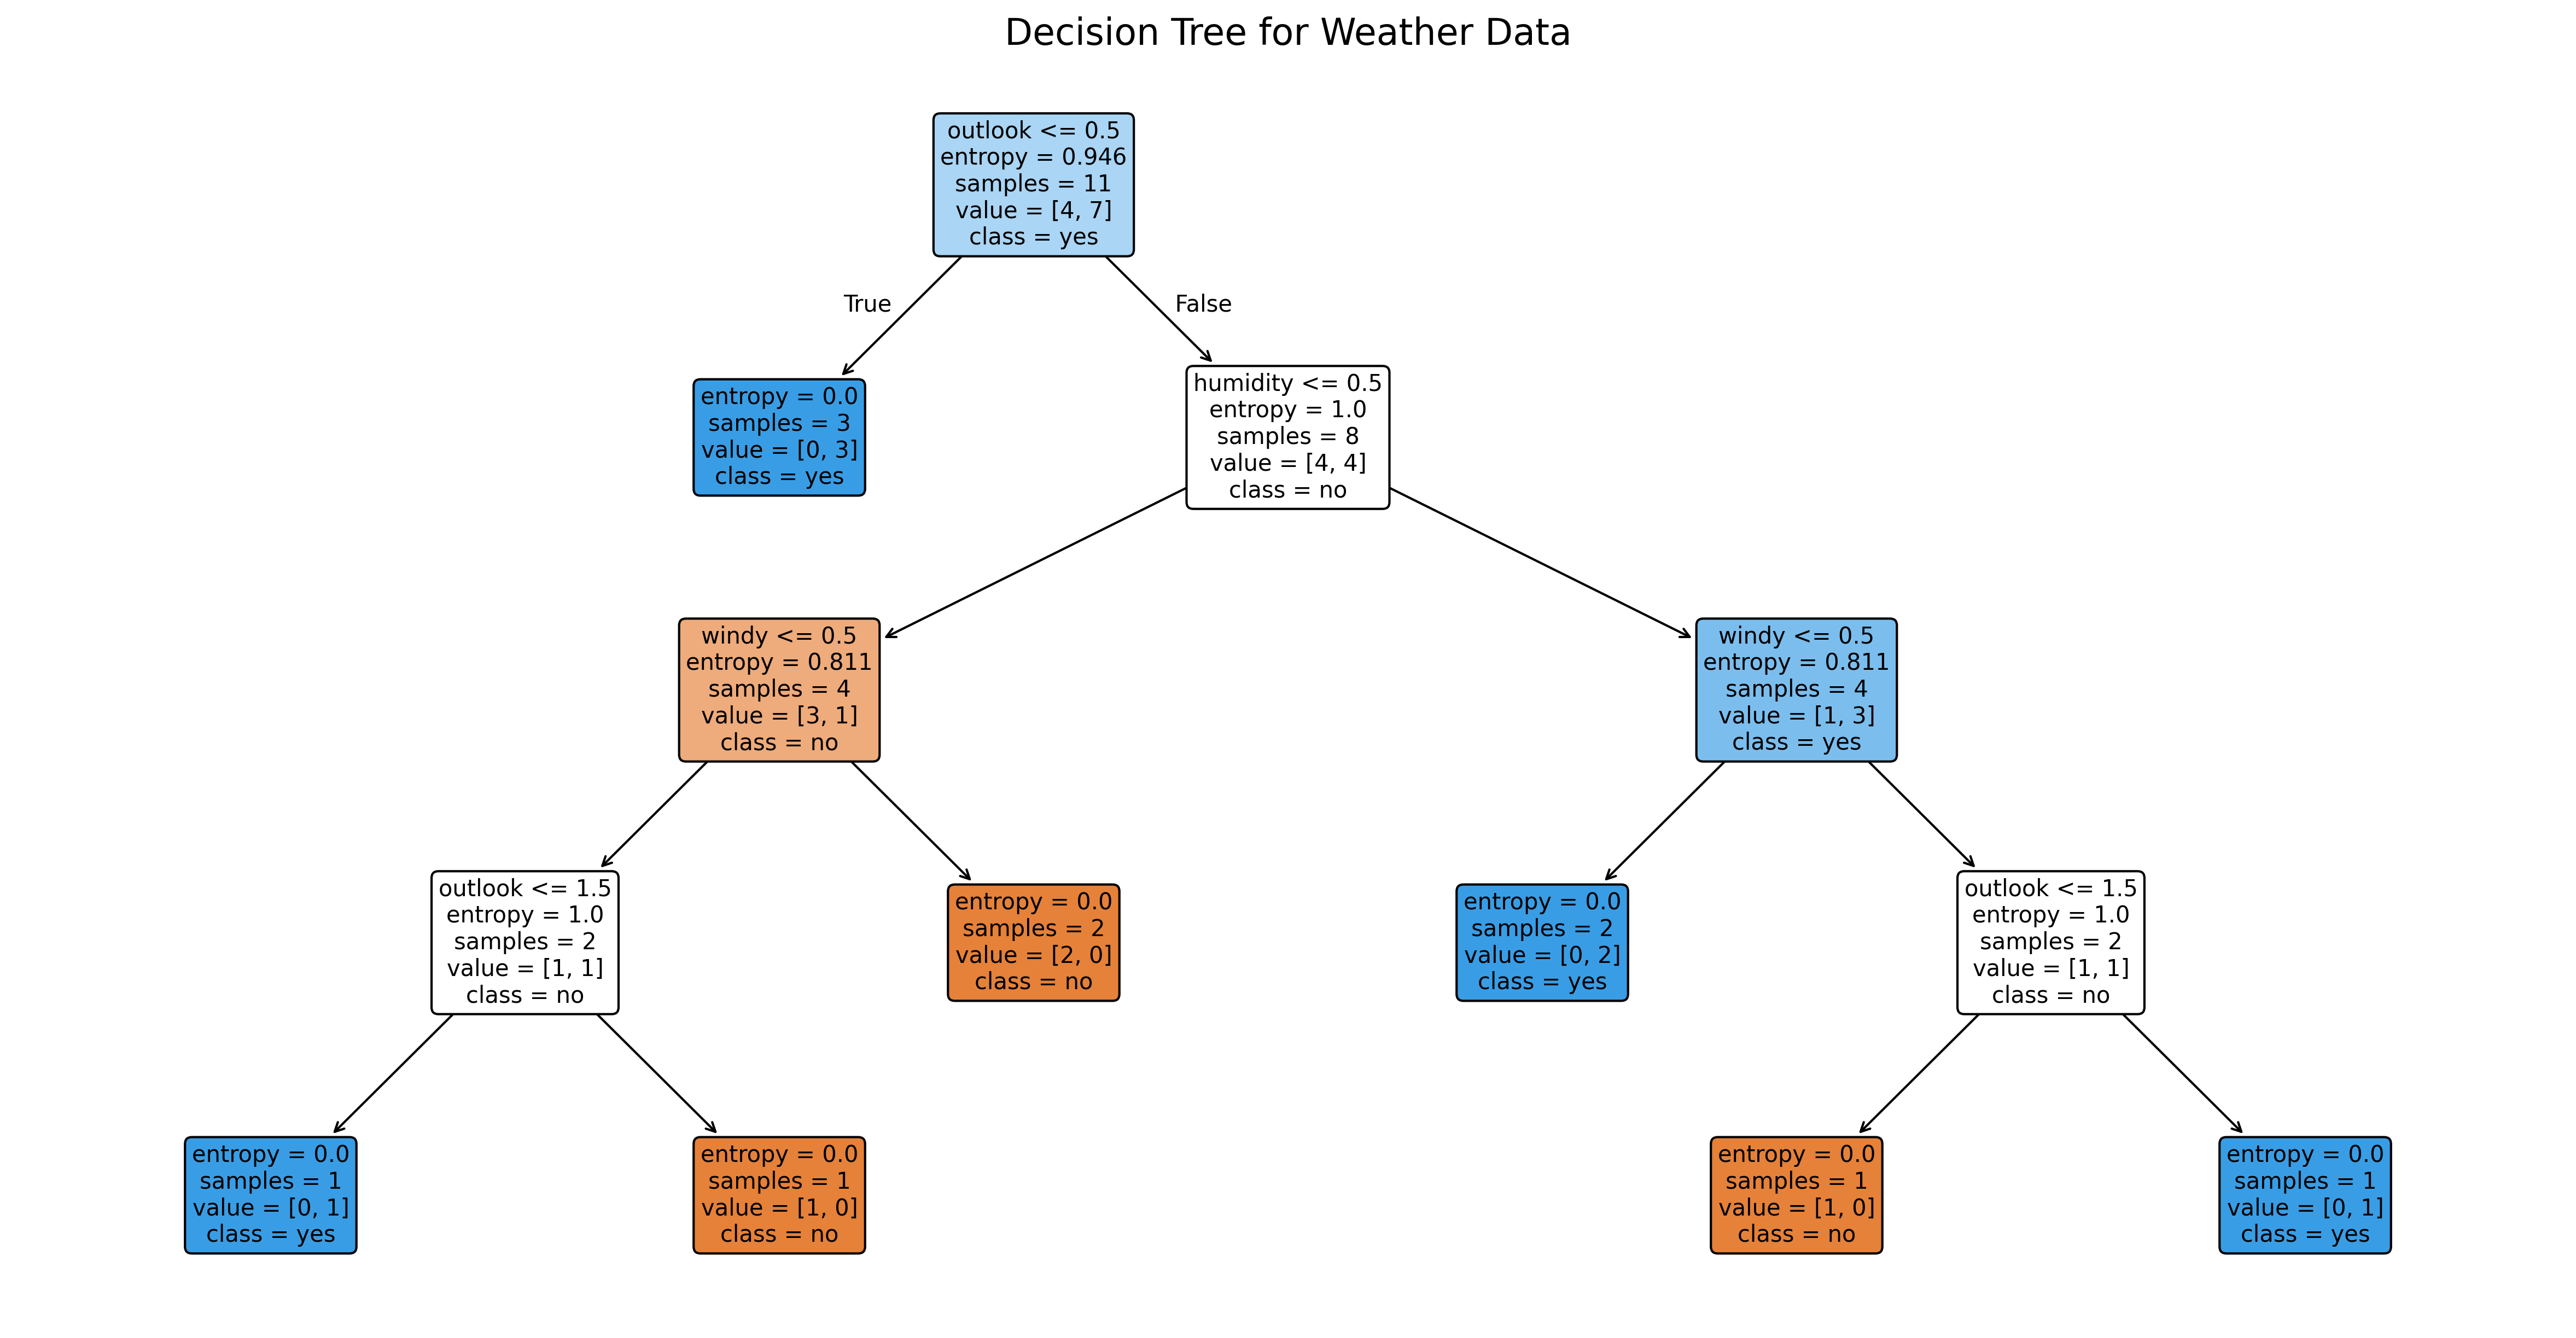

In [5]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import matplotlib.pyplot as plt
# Step 2: Load the weather dataset from the CSV file
df = pd.read_csv('/content/tennis.csv')

# Step 3: Display the first few rows of the dataset to understand its structure
print("First 5 rows of the dataset:")
print(df.head())

# Step 4: Preprocessing (lowercase column names)
le_outlook = LabelEncoder()
le_temp = LabelEncoder()
le_humidity = LabelEncoder()
le_windy = LabelEncoder()
le_play = LabelEncoder()

# Encoding the relevant columns (all lowercase as per your dataset)
df['outlook'] = le_outlook.fit_transform(df['outlook'])
df['temp'] = le_temp.fit_transform(df['temp'])
df['humidity'] = le_humidity.fit_transform(df['humidity'])
df['windy'] = le_windy.fit_transform(df['windy'])
df['play'] = le_play.fit_transform(df['play'])  # This is the target label

# Step 5: Define features (X) and the target variable (y)
X = df[['outlook', 'temp', 'humidity', 'windy']]  # Features
y = df['play']  # Target

# Step 6: Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Create a Decision Tree classifier using the ID3 algorithm (entropy criterion)
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Step 8: Train the classifier on the training data
clf.fit(X_train, y_train)

# Step 9: Predict the labels for the test data
y_pred = clf.predict(X_test)

# Step 10: Evaluate the model's accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 11: Classify a new weather sample
# For this, you need to encode the new sample using the same LabelEncoder used during training
new_sample = [[le_outlook.transform(['sunny'])[0],
               le_temp.transform(['cool'])[0],
               le_humidity.transform(['high'])[0],
               le_windy.transform(['false'])[0]]]

predicted_class = clf.predict(new_sample)

# Output the predicted class (whether to play tennis or not)
print(f"Predicted class for the new sample: {'yes' if le_play.inverse_transform([predicted_class[0]])[0] == 'yes' else 'no'}")

# Step 12: Visualize the decision tree with enhanced settings for better clarity
plt.figure(figsize=(20, 10), dpi=300)  # Increase figure size and DPI for higher resolution
plot_tree(clf,
          feature_names=['outlook', 'temp', 'humidity', 'windy'],
          class_names=le_play.classes_,
          filled=True,
          rounded=True,
          fontsize=10)  # Adjust the font size for better readability

plt.title("Decision Tree for Weather Data", fontsize=16)  # Larger title font
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import math

# Function to calculate entropy
def entropy(y):
    counts = Counter(y)
    probabilities = [count / len(y) for count in counts.values()]
    return -sum(p * math.log2(p) for p in probabilities)

# Function to calculate information gain
def information_gain(data, feature, target):
    total_entropy = entropy(data[target])
    values = data[feature].unique()
    weighted_entropy = sum((len(data[data[feature] == v]) / len(data)) * entropy(data[data[feature] == v][target]) for v in values)
    return total_entropy - weighted_entropy

# Recursive ID3 algorithm to build the decision tree
def id3(data, features, target):
    # If all target values are the same, return the label
    if len(set(data[target])) == 1:
        return data[target].iloc[0]

    # If no features left, return the most common label
    if len(features) == 0:
        return data[target].mode()[0]

    # Choose the best feature based on information gain
    gains = {feature: information_gain(data, feature, target) for feature in features}
    best_feature = max(gains, key=gains.get)

    # Create tree node
    tree = {best_feature: {}}

    # Split dataset and recurse for each value of the best feature
    for value in data[best_feature].unique():
        subset = data[data[best_feature] == value]
        remaining_features = [f for f in features if f != best_feature]
        tree[best_feature][value] = id3(subset, remaining_features, target)

    return tree

# Function to print decision tree in a readable format
def print_tree(tree, indent=""):
    if not isinstance(tree, dict):
        print(indent + "→ " + str(tree))
        return

    for key, value in tree.items():
        print(indent + str(key))
        for sub_key, sub_tree in value.items():
            print(indent + " └─ " + str(sub_key))
            print_tree(sub_tree, indent + "    ")

# Load dataset
file_path = '/content/tennis.csv'
data = pd.read_csv(file_path)

# Apply ID3 algorithm
features = list(data.columns[:-1])  # All columns except the target
target = 'play'
decision_tree = id3(data, features, target)

# Print the decision tree
print_tree(decision_tree)


outlook
 └─ sunny
    humidity
     └─ high
        → no
     └─ normal
        → yes
 └─ overcast
    → yes
 └─ rainy
    windy
     └─ False
        → yes
     └─ True
        → no
